In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.io
import seaborn as sns

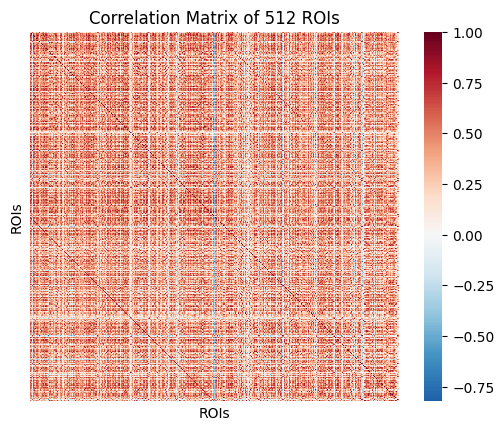

In [5]:
#load the data
single_subj = scipy.io.loadmat('/Users/yat-lok/Downloads/512Results_Functional/0302A/ROICorrelation_0302A.mat')
sns.heatmap(single_subj['ROICorrelation'], cmap='RdBu_r', center=0, square=True, xticklabels=False, yticklabels=False)
plt.title('Correlation Matrix of 512 ROIs')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

1. data:graph data for clinical groups
2. model: graph convolution network? how to convert my graph data to vectors?
3. loss: 
4. outcome: prediction, if this graph is belong to different clinical groups.

<Axes: >

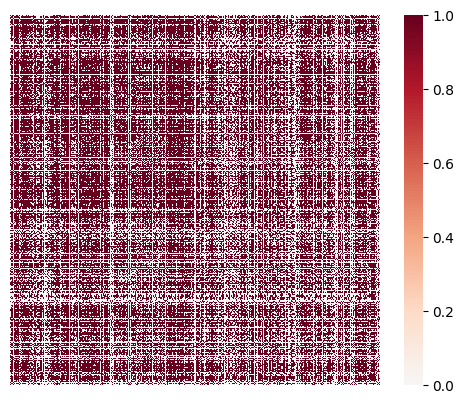

In [10]:
def build_network(correlation_matrix, threshold):
    # create a networkx graph
    G = nx.Graph()
    # add nodes with the label being the index of the roi
    G.add_nodes_from(range(correlation_matrix.shape[0]))
    # add edges to the graph for connections above a threshold
    for i in range(correlation_matrix.shape[0]):
        for j in range(i, correlation_matrix.shape[0]):
            if correlation_matrix[i, j] > threshold:
                G.add_edge(i, j)
    return G

# build the network
G = build_network(single_subj['ROICorrelation'], 0.3)
# draw the network
adjacency_matrix = np.array(nx.adjacency_matrix(G).todense().T)
sns.heatmap(adjacency_matrix, cmap='RdBu_r', center=0, square=True, xticklabels=False, yticklabels=False)